### ANÁLISE DOS DADOS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("sample_medicare.csv", sep=",")

FileNotFoundError: ignored

In [ ]:
df.head()

NameError: ignored

In [ ]:
df.dtypes

npi                                int64
nppes_provider_last_org_name      object
nppes_provider_first_name         object
nppes_provider_city               object
nppes_provider_state              object
specialty_description             object
description_flag                  object
drug_name                         object
generic_name                      object
bene_count                       float64
total_claim_count                  int64
total_30_day_fill_count          float64
total_day_supply                   int64
total_drug_cost                  float64
bene_count_ge65                  float64
bene_count_ge65_suppress_flag     object
total_claim_count_ge65           float64
ge65_suppress_flag                object
total_30_day_fill_count_ge65     float64
total_day_supply_ge65            float64
total_drug_cost_ge65             float64
dtype: object

In [ ]:
df.isnull().sum(axis=0)

npi                                  0
nppes_provider_last_org_name         3
nppes_provider_first_name            2
nppes_provider_city                  0
nppes_provider_state                 0
specialty_description                0
description_flag                     0
drug_name                            0
generic_name                         0
bene_count                       61372
total_claim_count                    0
total_30_day_fill_count              0
total_day_supply                     0
total_drug_cost                      0
bene_count_ge65                  86087
bene_count_ge65_suppress_flag    13841
total_claim_count_ge65           42521
ge65_suppress_flag               57945
total_30_day_fill_count_ge65     42103
total_day_supply_ge65            42236
total_drug_cost_ge65             42339
dtype: int64

#### Converte em % os nulos

In [ ]:
pd.DataFrame(df.isnull().sum(axis=0)).sort_values(by=0, ascending=False)/df.shape[0]

,0
bene_count_ge65,0.86087
bene_count,0.61372
ge65_suppress_flag,0.57945
total_claim_count_ge65,0.42521
total_drug_cost_ge65,0.42339
total_day_supply_ge65,0.42236
total_30_day_fill_count_ge65,0.42103
bene_count_ge65_suppress_flag,0.13841
nppes_provider_last_org_name,0.00003
nppes_provider_first_name,0.00002


#### Describe, com retorno de Percentiles

In [ ]:
df.describe(percentiles=[0.001, .01, .1, .25, .5, .75, .9, .99, .999])

,npi,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
count,1.000000e+05,38628.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,13913.000000,57479.000000,57897.000000,57764.000000,5.766100e+04
mean,1.498548e+09,28.713576,51.137660,74.597419,2109.676730,4.245201e+03,19.835118,48.060909,73.799373,2062.670591,3.465718e+03
std,2.880663e+08,27.706786,84.221171,129.506376,3929.466465,2.567230e+04,32.208941,94.803685,138.798766,3872.993071,2.243156e+04
min,1.003000e+09,11.000000,11.000000,11.000000,11.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
0.1%,1.003084e+09,11.000000,11.000000,11.000000,22.999000,2.555999e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1%,1.003999e+09,11.000000,11.000000,11.000000,68.000000,4.535980e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00
10%,1.104009e+09,12.000000,12.000000,13.000000,288.000000,1.204800e+02,0.000000,11.000000,11.000000,107.000000,5.459000e+01
25%,1.245488e+09,14.000000,15.000000,19.000000,449.000000,2.517975e+02,0.000000,13.000000,15.600000,390.000000,1.984100e+02
50%,1.497844e+09,20.000000,24.000000,34.000000,900.000000,6.761400e+02,13.000000,21.000000,31.000000,854.000000,5.987300e+02
75%,1.740577e+09,32.000000,51.000000,72.000000,2010.000000,2.363220e+03,24.000000,46.000000,69.000000,1950.000000,2.104990e+03


#### Histograma, por coluna e todas

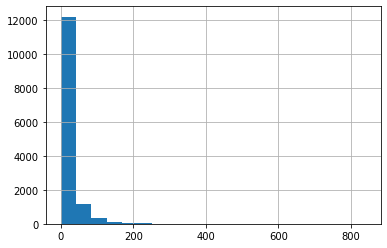

In [ ]:
df["bene_count_ge65"].dropna().hist(bins=20)
plt.show()

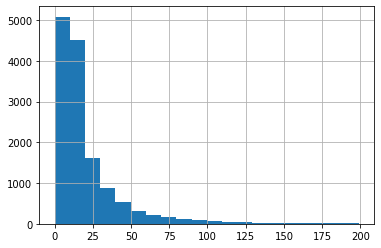

In [ ]:
df.loc[df["bene_count_ge65"]<200, "bene_count_ge65"].dropna().hist(bins=20)
plt.show()

In [ ]:
df["description_flag"].value_counts(dropna=False)

S    97586
T     2414
Name: description_flag, dtype: int64

In [ ]:
df["ge65_suppress_flag"].value_counts(dropna=False)

NaN    57945
#      27365
*      14690
Name: ge65_suppress_flag, dtype: int64

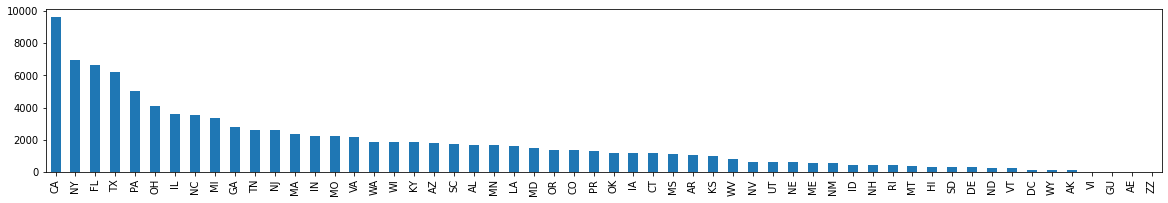

In [ ]:
fig, axs = plt.subplots(figsize=(20,3))
df["nppes_provider_state"].value_counts(dropna=False).plot(kind="bar")

# ESTRUTURAÇÃO DOS DADOS

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_consumo = {
    0: {"id": "xx1", "dt_consumo": "2020-11-03", "vl_consumo": 50},
    1: {"id": "xx1", "dt_consumo": "2020-11-15", "vl_consumo": 21},
    2: {"id": "xx2", "dt_consumo": "2020-11-18", "vl_consumo": 33},
    3: {"id": "xx2", "dt_consumo": "2020-12-16", "vl_consumo": 23},
    4: {"id": "xx3", "dt_consumo": "2020-11-06", "vl_consumo": 45},
    5: {"id": "xx4", "dt_consumo": "2020-12-18", "vl_consumo": 46},
    6: {"id": "xx4", "dt_consumo": "2020-11-18", "vl_consumo": 12},
    7: {"id": "xx4", "dt_consumo": "2020-11-04", "vl_consumo": 34},
}

In [ ]:
data_id = {
    0: {"id": "xx1", "dt_compra": "2020-12-01", "flg_comprou": 1},
    1: {"id": "xx2", "dt_compra": "2020-12-15", "flg_comprou": 1},
    2: {"id": "xx3", "dt_compra": np.nan, "flg_comprou": 0},
    3: {"id": "xx4", "dt_compra": np.nan, "flg_comprou": 0}
}

In [ ]:
df_consumo = pd.DataFrame.from_dict(data_consumo).transpose()
df_id = pd.DataFrame.from_dict(data_id).transpose()

In [ ]:
df_consumo.head()

,id,dt_consumo,vl_consumo
0,xx1,2020-11-03,50
1,xx1,2020-11-15,21
2,xx2,2020-11-18,33
3,xx2,2020-12-16,23
4,xx3,2020-11-06,45


In [ ]:
df_id.head()

,id,dt_compra,flg_comprou
0,xx1,2020-12-01,1
1,xx2,2020-12-15,1
2,xx3,NaN,0
3,xx4,NaN,0


#### Exemplo de Merge

In [ ]:
df_merge = pd.merge(df_id, df_consumo, left_on="id", right_on="id", how="left")
df_merge

In [ ]:
df_merge.loc[df_merge.dt_compra.isna(), "dt_compra"] = "2020-12-15"
df_merge

In [ ]:
df_select = df_merge.loc[df_merge.dt_consumo < df_merge.dt_compra,:]
df_select

In [ ]:
df_select[["id", "vl_consumo"]].groupby(by="id").sum()

,vl_consumo
id,
xx1,71
xx2,33
xx3,45
xx4,46


In [ ]:
df_agg = df_select[['id', 'dt_consumo', 'vl_consumo']].groupby(by="id").agg({
    'dt_consumo': 'max',
    'vl_consumo': ['sum','min','max'],
    'id': 'count'
})
df_agg

In [ ]:
df_agg.columns = ['.'.join(col).strip() if col[1] != "" else col[0] for col in df_agg.columns.values]
df_agg

# PIVOT TABLES

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo", "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two", "one", "one", "two", "two"], 
                   "C": ["small", "large", "large", "small", "small", "large", "small", "small", "large"], 
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7], 
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

In [ ]:
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [ ]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum)

In [ ]:
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [ ]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum, fill_value=0)

In [ ]:
table

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      4      1
    two      0      6

In [ ]:
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'B'],
                    aggfunc={'D': np.sum,
                             'E': [min, max, np.mean]})

In [ ]:
table

D    E               
        sum  max      mean  min
A   B                          
bar one   9  8.0  7.000000  6.0
    two  13  9.0  9.000000  9.0
foo one   5  5.0  3.666667  2.0
    two   6  6.0  5.500000  5.0

# ONE-HOT ENCODING

In [ ]:
df = pd.DataFrame({'animal': ['dog', 'cat', 'dog'], 'sexo': ['macho', 'femea', 'femea'],
                   'idade': [1, 2, 3]})

In [ ]:
df

,animal,sexo,idade
0,dog,macho,1
1,cat,femea,2
2,dog,femea,3


In [ ]:
pd.get_dummies(df, prefix=['animal', 'sexo'], drop_first=True)

,idade,animal_dog,sexo_macho
0,1,1,1
1,2,0,0
2,3,1,0


# CAT CODES

In [ ]:
for col in ['animal', 'sexo']:
    df[col] = df[col].astype('category')

cat_columns = df.select_dtypes(['category']).columns

map_categ_cols = {}
for col in cat_columns:
    map_categ_cols[col] = dict( enumerate(df[col].cat.categories) )
print(map_categ_cols)

df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

{'animal': {0: 'cat', 1: 'dog'}, 'sexo': {0: 'femea', 1: 'macho'}}


In [ ]:
df

,animal,sexo,idade
0,1,1,1
1,0,0,2
2,1,0,3


# TRATAMENTO DE NULOS

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))
df

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


### FILL VALUE 

In [ ]:
fill_value = df.b.median() 
df["b"] = df["b"].fillna(fill_value)

In [ ]:
df

,a,b,c,d
0,0.0,3.0,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


### DROPNA- Exclui valores nulos

In [ ]:
df.dropna(subset=["a"])

,a,b,c,d
0,0.0,3.0,-1.0,1.0
2,2.0,3.0,NaN,9.0


### INTERPOLATE

In [ ]:
df.interpolate(method='linear', limit_direction='forward', axis=0)

,a,b,c,d
0,0.0,3.0,-1.0,1.0
1,1.0,2.0,-2.0,5.0
2,2.0,3.0,-3.0,9.0
3,2.0,4.0,-4.0,16.0


### FORWARD / BACKWARD FILLING

In [ ]:
df

,a,b,c,d
0,0.0,3.0,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


In [ ]:
# method={'backfill', 'bfill', 'pad', 'ffill'}
df.fillna(method='ffill')

,a,b,c,d
0,0.0,3.0,-1.0,1.0
1,0.0,2.0,-1.0,1.0
2,2.0,3.0,-1.0,9.0
3,2.0,4.0,-4.0,16.0


### Count / Frequency Mapping 

#### Count

In [ ]:
df = pd.DataFrame({'animal': ['dog', 'cat', 'dog'], 'sexo': ['macho', 'femea', 'femea'],
                   'idade': [1, 2, 3]})

In [ ]:
df

,animal,sexo,idade
0,dog,macho,1
1,cat,femea,2
2,dog,femea,3


In [ ]:
df["animal"].value_counts()

dog    2
cat    1
Name: animal, dtype: int64

In [ ]:
# loop to find the different count of categories in a dict and apply them to the variable
# in train and test set.
for variable in ['animal', 'sexo']:
    count_map = df[variable].value_counts().to_dict()
    df[variable] = df[variable].map(lambda x: count_map[x])

In [ ]:
df

,animal,sexo,idade
0,2,1,1
1,1,2,2
2,2,2,3


#### Frequency

In [ ]:
# loop to find the different count of categories in a dict and apply them to the variable
# in train and test set.
for variable in ['animal', 'sexo']:
    count_map = df[variable].value_counts().to_dict()
    var_sum = df[variable].shape[0]
    df[variable] = df[variable].map(lambda x: count_map[x])/var_sum

In [ ]:
df

,animal,sexo,idade
0,0.666667,0.333333,1
1,0.333333,0.666667,2
2,0.666667,0.666667,3


# OUTLIERS

In [ ]:
import random 
df = pd.DataFrame([random.gauss(0, sigma=1) for i in range(5000)],columns=["value"])
df.loc[df.sample(10).index,"value"] += 3
df.loc[df.sample(10).index,"value"] -= 3

In [ ]:
df

,value
0,0.093218
1,1.222443
2,-0.102830
3,0.422315
4,0.037353
...,...
4995,0.684130
4996,-0.835316
4997,-1.007359
4998,-1.614637


In [ ]:
Q1=df['value'].quantile(0.25)
Q3=df['value'].quantile(0.75)
IQR=Q3-Q1
print("Q1", Q1)
print("Q3", Q3)
print("IQR", IQR)
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Normal Range", lower_bound, "-", upper_bound)

Q1 -0.6808696615215738
Q3 0.6846426606656035
IQR 1.3655123221871772
Normal Range -2.7291381448023397 - 2.732911143946369


In [ ]:
df['value'].describe(percentiles=[0.01,0.1,0.25,0.50,0.75,0.90,0.99])

count    5000.000000
mean       -0.002891
std         1.031276
min        -4.650595
1%         -2.529153
10%        -1.289100
25%        -0.680870
50%         0.004154
75%         0.684643
90%         1.278059
99%         2.380691
max         4.302409
Name: value, dtype: float64

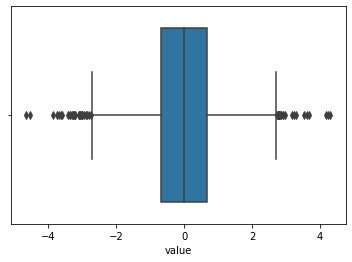

In [ ]:
import seaborn as sns
sns.boxplot(data=df,x=df['value'])

In [ ]:
from scipy import stats
z=np.abs(stats.zscore(df.value))
print(z)

[0.09360272 1.19827657 0.09818248 ... 0.98304576 1.57711967 0.03824779]


In [2]:
z.describe()

NameError: name 'z' is not defined

In [ ]:
df[(df.value<df.value.mean()-3*df.value.std()) | (df.value>df.value.mean()+3*df.value.std())].shape

(27, 1)

In [ ]:
df[z>3].shape

(27, 1)

In [ ]:
new_df = df[z<3]
new_df.shape

(4973, 1)

In [ ]:
lower_bound = df.value.mean()-3*df.value.std()
upper_bound = df.value.mean()+3*df.value.std()
df[df.value<lower_bound] = lower_bound
df[(df.value>upper_bound)] = upper_bound

In [ ]:
df.describe()

,value
count,5000.000000
mean,-0.002426
std,1.021923
min,-3.069448
25%,-0.680870
50%,0.004154
75%,0.684643
max,3.064517


# Filter

In [ ]:
df_churn_enriq["rt_like_dislike"] = df_churn_enriq.likes_mean / df_churn_enriq.dislikes_mean

# TRATAMENTO DE DATAS

In [ ]:
df = pd.DataFrame({'dt_compra': {0: '26/1/2016', 1: '5/11/2016'}})

In [ ]:
df

,dt_compra
0,26/1/2016
1,5/11/2016


In [ ]:
pd.to_datetime(df['dt_compra'].astype(str), format='%d/%m/%Y')

0   2016-01-26
1   2016-11-05
Name: dt_compra, dtype: datetime64[ns]

In [ ]:
df = pd.DataFrame({'dt_compra': {0: '26/1/16', 1: '5/11/16'}, 'dt_venda': {0: '26/2/16', 1: '9/11/16'}})

In [ ]:
df

,dt_compra,dt_venda
0,26/1/16,26/2/16
1,5/11/16,9/11/16


In [ ]:
df['dt_compra'] = pd.to_datetime(df['dt_compra'].astype(str), format='%d/%m/%y')

In [ ]:
df['dt_venda'] = pd.to_datetime(df['dt_venda'].astype(str), format='%d/%m/%y')

In [ ]:
df['qt_dias_dif'] = (df.dt_venda - df.dt_compra)

In [ ]:
df['qt_dias_dif']

0   31 days
1    4 days
Name: qt_dias_dif, dtype: timedelta64[ns]

In [ ]:
df['qt_dias_dif'].map(lambda x: x.components.days)

0    31
1     4
Name: qt_dias_dif, dtype: int64

# Limpeza de texto

In [ ]:
from nltk.tokenize import word_tokenize 
from nltk.tokenize import TreebankWordTokenizer, WordPunctTokenizer, WhitespaceTokenizer 
from nltk.stem import SnowballStemmer 
from nltk.corpus import stopwords 
import string 
import re 
snowball_stemmer = SnowballStemmer('portuguese')

def clean_text(sentence): 
    word_tokens = word_tokenize(sentence) 
    new_words= [word for word in word_tokens if (word not in string.punctuation and not re.match("[0-9]+", word))] 
    clean_tokens = new_words[:] 
    for token in clean_tokens: 
        if token in stopwords.words('english'): 
            clean_tokens.remove(token) 
    return ' '.join(clean_tokens) 

# ROLLING FILTERS

In [ ]:
import sklearn.datasets
df = sklearn.datasets.load_boston()

In [ ]:
df

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
df = pd.DataFrame(sklearn.datasets.load_boston()['target'], columns=["value"])

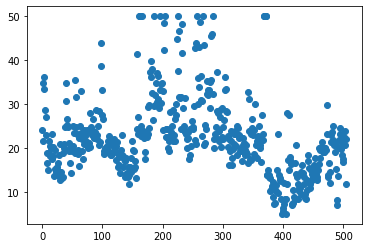

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=df.index,y=df["value"])
plt.show()

In [ ]:
df["less_noise_value"] = df.value.rolling(window=5).mean()

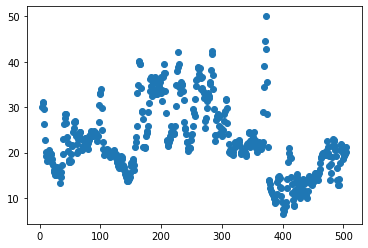

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=df.index,y=df["less_noise_value"])
plt.show()

In [ ]:
df["less_noise_value"] = df.value.rolling(window=20).median()

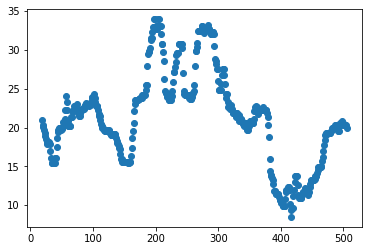

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=df.index,y=df["less_noise_value"])
plt.show()

# ENRIQUECIMENTO DOS DADOS

## OPERAÇÕES MATEMÁTICAS: UNIVARIADO

### Square-root / Log

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer

# load your data
data = pd.read_csv("StatewiseTestingDetails.csv")
data.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [ ]:
data.Negative = data.Negative.map(lambda x: int(x) if not pd.isnull(x) and x!=" " else np.nan)

In [ ]:
data.describe()

,TotalSamples,Negative,Positive
count,1.274500e+04,5.903000e+03,5.387000e+03
mean,3.487248e+06,1.344177e+06,5.177431e+04
std,5.655272e+06,2.373692e+06,1.650334e+05
min,5.800000e+01,0.000000e+00,0.000000e+00
25%,1.053860e+05,5.273900e+04,4.720000e+02
50%,5.723320e+05,3.274010e+05,4.058000e+03
75%,5.042392e+06,1.410066e+06,3.250750e+04
max,4.055388e+07,1.521953e+07,1.638961e+06


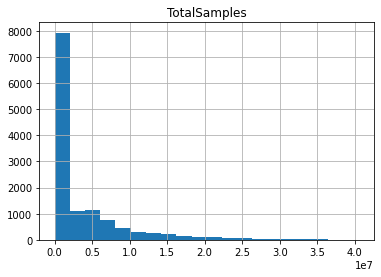

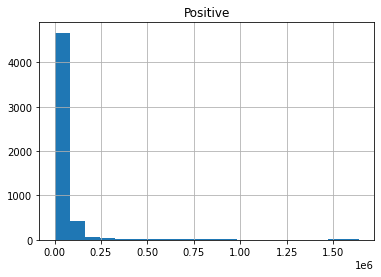

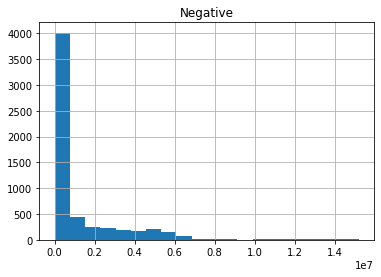

In [ ]:
for col in ['TotalSamples','Positive', 'Negative']:
    data[[col]].dropna().hist(bins=20)
    plt.show()

In [ ]:
# create columns variables to hold the columns that need transformation
cols = ['TotalSamples']

# create the function transformer object with logarithm transformation
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

# apply the transformation to your data
for col in cols:
    data['{}_sqrt'.format(col)] = sqrt_transformer.transform(data[cols])

In [ ]:
for col in ['TotalSamples_sqrt']:
    data[[col]].hist(bins=20)

NameError: name 'data' is not defined

In [ ]:
# create columns variables to hold the columns that need transformation
cols = ['TotalSamples']

# create the function transformer object with logarithm transformation
logarithm_transformer = FunctionTransformer(np.log, validate=True)

# apply the transformation to your data
for col in cols:
    data['{}_log'.format(col)] = logarithm_transformer.transform(data[cols])

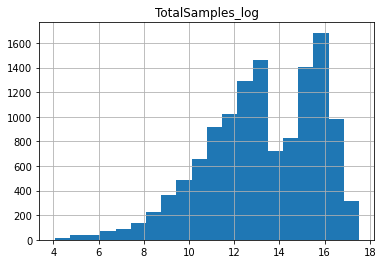

In [ ]:
for col in ['TotalSamples_log']:
    data[[col]].hist(bins=20)

### Box-Cox Transformation

In [ ]:
# import the needed packages.
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

In [ ]:
# create the power transformer object with method 'box-cox'
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)

# apply the transformation to your data
for col in cols:
    data['{}_box-cox'.format(col)] = boxcox_transformer.fit_transform(data[cols])

In [ ]:
boxcox_transformer.lambdas_

array([0.10287546])

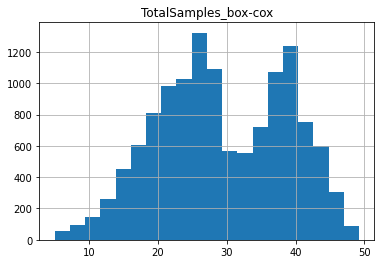

In [ ]:
for col in ['TotalSamples_box-cox']:
    data[[col]].hist(bins=20)

### Inverso 

In [ ]:
cols = ['TotalSamples']

# create the function transformer object with reciprocal transformation
reciprocal_transformer = FunctionTransformer(np.reciprocal, validate=True)

# apply the transformation to your data
for col in cols:
    data['{}_inverse'.format(col)] = reciprocal_transformer.fit_transform(data[cols])

In [ ]:
data['TotalSamples'].describe()

count    1.274500e+04
mean     3.487248e+06
std      5.655272e+06
min      5.800000e+01
25%      1.053860e+05
50%      5.723320e+05
75%      5.042392e+06
max      4.055388e+07
Name: TotalSamples, dtype: float64

In [ ]:
data['TotalSamples_inverse'].describe()

count    1.274500e+04
mean     7.570502e-05
std      6.003393e-04
min      2.465856e-08
25%      1.983186e-07
50%      1.747238e-06
75%      9.488926e-06
max      1.724138e-02
Name: TotalSamples_inverse, dtype: float64

## OPERAÇÕES MATEMÁTICAS: BIVARIADO

### Somas e Diferenças

In [ ]:
data['dif_positive'] = data.Positive - data.Positive.mean()

In [ ]:
data.Positive.describe()

count    5.387000e+03
mean     5.177431e+04
std      1.650334e+05
min      0.000000e+00
25%      4.720000e+02
50%      4.058000e+03
75%      3.250750e+04
max      1.638961e+06
Name: Positive, dtype: float64

In [ ]:
data[['dif_positive']].describe()

,dif_positive
count,5.387000e+03
mean,1.764707e-10
std,1.650334e+05
min,-5.177431e+04
25%,-5.130231e+04
50%,-4.771631e+04
75%,-1.926681e+04
max,1.587187e+06


### Multiplicação / Divisão

In [ ]:
data['pc_negative']=data.Negative / data.TotalSamples
data['pc_positive']=data.Positive / data.TotalSamples

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0ae5b2750>]],
      dtype=object)

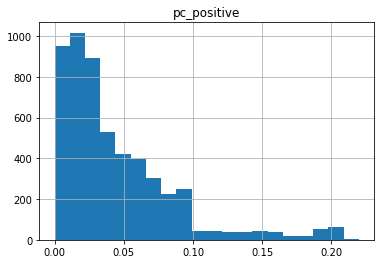

In [ ]:
data[['pc_positive']].hist(bins=20)

In [ ]:
data['pc_negative'].describe()

count    5903.000000
mean        0.925402
std         0.059737
min         0.000000
25%         0.910543
50%         0.938941
75%         0.962635
max         1.064917
Name: pc_negative, dtype: float64

## DISCRETIZAÇÃO

### Equal-Width

In [ ]:
# import the libraries
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

# load your data
data = pd.read_csv("StatewiseTestingDetails.csv")

In [ ]:
data

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
12740,2021-04-25,West Bengal,10166796.0,NaN,NaN
12741,2021-04-26,West Bengal,10215358.0,NaN,NaN
12742,2021-04-27,West Bengal,10270645.0,NaN,NaN
12743,2021-04-28,West Bengal,10325581.0,NaN,NaN


In [ ]:
# create the discretizer object with strategy uniform and 8 bins
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform') 

# fit the discretizer to the train set
discretizer.fit(data[["TotalSamples"]].values)

# apply the discretisation
data["TotalSamples_Group"] = discretizer.transform(data[["TotalSamples"]].values)

In [ ]:
data["TotalSamples_Group"].value_counts()

0.0    9573
1.0    1809
2.0     681
3.0     350
4.0     206
5.0      58
6.0      43
7.0      25
Name: TotalSamples_Group, dtype: int64

### Equal-frequency

In [ ]:
# create the discretizer object with strategy uniform and 8 bins
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile') 

# fit the discretizer to the train set
discretizer.fit(data[["TotalSamples"]].values)

# apply the discretisation
data["TotalSamples_Group"] = discretizer.transform(data[["TotalSamples"]].values)

In [ ]:
data["TotalSamples_Group"].value_counts()

7.0    1594
6.0    1593
5.0    1593
4.0    1593
3.0    1593
2.0    1593
1.0    1593
0.0    1593
Name: TotalSamples_Group, dtype: int64

## OPERAÇÕES DE TEXTO

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

sentence = "Eu estou estudando ciência de dados na Dinânima há 2 meses, estou amando!!!"
word_tokens = word_tokenize(sentence)
print(word_tokens)

['Eu', 'estou', 'estudando', 'ciência', 'de', 'dados', 'na', 'Dinânima', 'há', '2', 'meses', ',', 'estou', 'amando', '!', '!', '!']


In [ ]:
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer('portuguese')
print(snowball_stemmer.stem('estudando'))
print(snowball_stemmer.stem('estudar'))
print(snowball_stemmer.stem('estudei'))

estud
estud
estud


In [ ]:
[snowball_stemmer.stem(x) for x in word_tokens]

['eu',
 'estou',
 'estud',
 'ciênc',
 'de',
 'dad',
 'na',
 'dinânim',
 'há',
 '2',
 'mes',
 ',',
 'estou',
 'amand',
 '!',
 '!',
 '!']

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
new_words= [word for word in word_tokens if word not in string.punctuation]
new_words

['Eu',
 'estou',
 'estudando',
 'ciência',
 'de',
 'dados',
 'na',
 'Dinânima',
 'há',
 '2',
 'meses',
 'estou',
 'amando']

In [ ]:
new_words= [word for word in word_tokens if word not in string.punctuation+"0123456789"]
new_words

['Eu',
 'estou',
 'estudando',
 'ciência',
 'de',
 'dados',
 'na',
 'Dinânima',
 'há',
 'meses',
 'estou',
 'amando']

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
print(stopwords.words('portuguese'))

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [ ]:
new_words = [x.lower() for x in new_words]

In [ ]:
new_words

['eu',
 'estou',
 'estudando',
 'ciência',
 'de',
 'dados',
 'na',
 'dinânima',
 'há',
 'meses',
 'estou',
 'amando']

In [ ]:
clean_tokens = new_words[:] 
for token in clean_tokens:
    if token in stopwords.words('portuguese'):
        clean_tokens.remove(token)

print(clean_tokens)

['estudando', 'ciência', 'dados', 'dinânima', 'meses', 'estou', 'amando']


# PRODUTIZAÇÃO

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))

In [ ]:
df.b = df.b.fillna(0)

In [ ]:
df.d = df.d.fillna(df.d.mean())

In [ ]:
def treat_na_fill(df, select_columns, fill_values):
  for col in select_columns:
    df[col] = df[col].fillna(fill_values[col])
  return df

In [ ]:
df.head()

,a,b,c,d
0,0.0,0.0,-1.0,1.000000
1,NaN,2.0,NaN,8.666667
2,2.0,3.0,NaN,9.000000
3,NaN,4.0,-4.0,16.000000


In [ ]:
df = treat_na_fill(df, ['b', 'd'], {'b': 0, 'd': df.d.mean()})

In [ ]:
def treat_na_drop(df, select_columns):
  for col in select_columns:
    df = df.drop(col, axis=1)
  return df

In [ ]:
df = treat_na_drop(df, ['a', 'c'])

In [ ]:
df.head()

,b,d
0,0.0,1.000000
1,2.0,8.666667
2,3.0,9.000000
3,4.0,16.000000


In [ ]:
assert df.dropna().shape[0] == df.shape[0]

In [ ]:
df = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))

In [ ]:
df.pipe(treat_na_fill, ['b', 'd'], {'b': 0, 'd': df.d.mean()}
        ).pipe(treat_na_drop, ['a', 'c'])

,b,d
0,0.0,1.000000
1,2.0,8.666667
2,3.0,9.000000
3,4.0,16.000000
